In [1]:
import os
print(os.getcwd())

/home/arora/Crossword-Solver


In [2]:
import requests

# Set the URL of the server
url = "http://127.0.0.1:5000"

# Path to the image file on your local disk
image_path = "/home/arora/Crossword-Solver/mtflasktut/images/meow.png"

# Open the image file in binary mode
with open(image_path, "rb") as image_file:
    # Prepare the files parameter with the image file
    files = {"image": image_file}
    
    # Send the POST request with body and files
    res = requests.post(url, files= files)
    
# Check the response
print(res.status_code)

200


In [21]:
import requests

# Set the URL of the server
url = "http://127.0.0.1:5000"

# Path to the image file on your local disk
image_path = "/home/arora/Crossword-Solver/mtflasktut/images/meow.png"

# Open the image file in binary mode
with open(image_path, "rb") as image_file:
    # Prepare the files parameter with the image file
    files = {"image": image_file}
    
    # Send the POST request with body and files
    res = requests.post(url, files= files)
    
# Check the response
# print(res.text) # assuming the response in in JSON format

In [2]:
import requests
import matplotlib.pyplot as plt
import cv2

# Set the URL of the server
url = "http://127.0.0.1:5000"  # Make sure this matches your Flask app's URL

# Path to the image file on your local disk
image_path = "/home/arora/Crossword-Solver/Testing/crosswordE.jpg"

# Load the original image using OpenCV (to display it)
original_image = cv2.imread(image_path)
# Convert the image from BGR to RGB (OpenCV uses BGR by default)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Open the image file in binary mode and send the POST request
with open(image_path, "rb") as image_file:
    files = {"image": image_file}
    res = requests.post(url, files=files)

# Check the response
print(res.status_code)
# print(res.text)  # Assuming the response is in JSON format

# # Display the original image
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(original_image)
# plt.axis('off')  # Hide axes

# # Assuming you have a way to get the transformed image
# # For now, we'll just show the original image again in the transformed section
# plt.subplot(1, 2, 2)
# plt.title("Transformed Image")
# plt.imshow(original_image)  # Change this to the transformed image when available
# plt.axis('off')  # Hide axes

# plt.show()

200


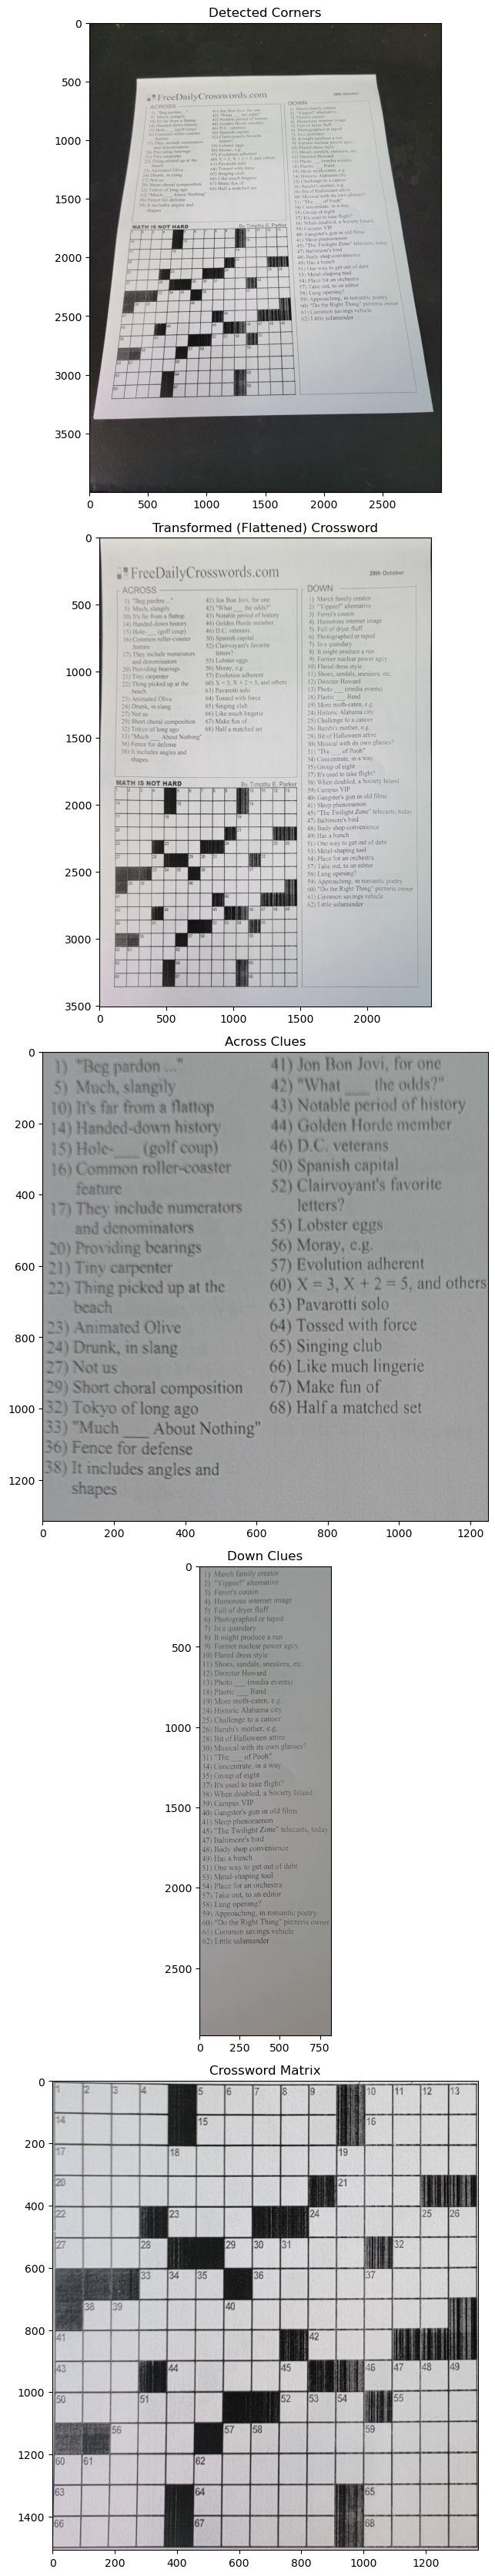

200


In [68]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import io

# Set the URL of the server
url = "http://127.0.0.1:5000"

# Path to the image file on your local disk
image_path = "/home/arora/Crossword-Solver/Testing/crosswordE.jpg"  # Change as needed

# Open the image file in binary mode
with open(image_path, "rb") as image_file:
    # Prepare the files parameter with the image file
    files = {"image": image_file}
    
    # Send the POST request with body and files
    res = requests.post(url, files=files)

# Check the response
if res.status_code == 200:
    response_data = res.json()
    original_image_hex = response_data['original_image']
    transformed_image_hex = response_data['transformed_image']
    box1_across_hex = response_data['box1_across']
    box2_down_hex = response_data['box2_down']
    box3_matrix_hex = response_data['box3_matrix']
    # box3_2d_matrix_hex = response_data['box3_2d_matrix']

    # Convert hex to bytes
    original_image_bytes = bytes.fromhex(original_image_hex)
    transformed_image_bytes = bytes.fromhex(transformed_image_hex)
    box1_across_bytes = bytes.fromhex(box1_across_hex)
    box2_down_bytes = bytes.fromhex(box2_down_hex)
    box3_matrix_bytes = bytes.fromhex(box3_matrix_hex)
    # box3_2d_matrix_bytes = bytes.fromhex(box3_2d_matrix_hex)

    # Create a larger figure
    plt.figure(figsize=(60, 40))  # Adjust the figure size as needed

    # Display original image
    original_image = plt.imread(io.BytesIO(original_image_bytes), format='png')
    plt.subplot(611), plt.imshow(original_image)
    plt.title('Detected Corners')
    
    # Display transformed image
    transformed_image = plt.imread(io.BytesIO(transformed_image_bytes), format='png')
    plt.subplot(612), plt.imshow(transformed_image)
    plt.title('Transformed (Flattened) Crossword')
    
    # Display transformed image
    box1_across_image = plt.imread(io.BytesIO(box1_across_bytes), format='png')
    plt.subplot(613), plt.imshow(box1_across_image)
    plt.title('Across Clues')    
    
    # Display transformed image
    box2_down_image = plt.imread(io.BytesIO(box2_down_bytes), format='png')
    plt.subplot(614), plt.imshow(box2_down_image)
    plt.title('Down Clues')    

    # Display transformed image
    box3_matrix_image = plt.imread(io.BytesIO(box3_matrix_bytes), format='png')
    plt.subplot(615), plt.imshow(box3_matrix_image, cmap='gray')
    plt.title('Crossword Matrix')
    
    # # Display transformed image
    # box3_2d_matrix_image = plt.imread(io.BytesIO(box3_2d_matrix_bytes), format='png')
    # plt.subplot(616), plt.imshow(box3_matrix_image, cmap='gray')
    # plt.title('Crossword Matrix')
    
    plt.tight_layout()  # Adjust spacing between subplots    
    plt.show()
    print(res.status_code)
else:
    if res.status_code != 200:
        print(f"Error: {res.status_code} - {res.text}")

In [20]:

import requests
import urllib

# Note: "%3F" is a reserved URI character representing "?"

# Define the base url where we will be posting a request
url = "https://www.dictionary.com/e/crosswordsolver/"

# Website result request modification per clue based on result length expectation from matrix
# Currently an example
url = url+ "/"

parameters = {
    "p" : "????",
    "l" : 4
}

res=requests.get(url+f"?{urllib.parse.urlencode(parameters)}")
# print(res,res.text)

pos= res.text.find('class="solver-table"')

# We will need to extract the results from this for answers
print(res.text[pos:])

In [4]:
import requests
import urllib
from bs4 import BeautifulSoup

# Define the base URL where we will be posting a request
url = "https://www.dictionary.com/e/crosswordsolver/"

# Modify URL and parameters based on clues (example here)
url = url + "Beg-pardon-.../"

parameters = {
    "p": "????",  # The pattern of letters for the crossword
    "l": 4        # The expected length of the word
}

# Send GET request with the encoded parameters
response = requests.get(url + f"?{urllib.parse.urlencode(parameters)}")

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all rows with possible answers
    rows = soup.find_all('div', class_='solver-table__row')
    
    # Initialize a list to store the answers
    answers = []

    # Iterate through the rows and extract the answer and confidence
    for row in rows:
        # Find the div with data-cy="result" to get the answer
        answer_cell = row.find('div', attrs={'data-cy': 'result'})
        if answer_cell:
            answer = answer_cell.text.strip()  # Clean up the answer text
            answers.append(answer)
    
    # Print or process the answers list
    print("Possible Answers:", answers)

else:
    print("Error: Unable to fetch results.")

Possible Answers: ['AHEM', 'WHAT', 'ISAY', 'IBEG', 'AINT', 'VERB', 'PRIE', 'ESPN', 'AGOD']


In [21]:
import requests
import urllib

def request_possible_answers(pattern, length):
    url = "https://www.dictionary.com/e/crosswordsolver/"
    parameters = {
        "p": pattern,
        "l": length
    }
    response = requests.get(url + f"?{urllib.parse.urlencode(parameters)}")
    
    # Process the response to extract answers (similar to the previous code)
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find all rows with possible answers
        rows = soup.find_all('div', class_='solver-table__row')
        
        # Initialize a list to store the answers
        answers = []

        # Iterate through the rows and extract the answer and confidence
        for row in rows:
            # Find the div with data-cy="result" to get the answer
            answer_cell = row.find('div', attrs={'data-cy': 'result'})
            if answer_cell:
                answer = answer_cell.text.strip()  # Clean up the answer text
                answers.append(answer)
        
        # Print or process the answers list
        print("Possible Answers:", answers)

    else:
        print("Error: Unable to fetch results.")
    
    return answers
